# Predicting Crime & Safety: Los Angeles Crime Data Analysis and Visualization
#### CSC 457/557 (Data Analysis, Decision Making, and Visualization)
#### Final Project of Fall-2023
#### Al-Amin Hossain

In [7]:
# necessary libraries
import pandas as pd
import missingno as msno
import numpy as np
import matplotlib.pyplot as pyplot

In [2]:
# reading the data using pandas
df = pd.read_csv("data/Crime_Data_from_2020_to_Present.csv")

## Data Cleaning

In [3]:
# checking the number of row and colums
df.shape

(798242, 28)

In [4]:
# checking the columns name, data-count for each column and data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 798242 entries, 0 to 798241
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           798242 non-null  int64  
 1   Date Rptd       798242 non-null  object 
 2   DATE OCC        798242 non-null  object 
 3   TIME OCC        798242 non-null  int64  
 4   AREA            798242 non-null  int64  
 5   AREA NAME       798242 non-null  object 
 6   Rpt Dist No     798242 non-null  int64  
 7   Part 1-2        798242 non-null  int64  
 8   Crm Cd          798242 non-null  int64  
 9   Crm Cd Desc     798242 non-null  object 
 10  Mocodes         688290 non-null  object 
 11  Vict Age        798242 non-null  int64  
 12  Vict Sex        693589 non-null  object 
 13  Vict Descent    693581 non-null  object 
 14  Premis Cd       798233 non-null  float64
 15  Premis Desc     797770 non-null  object 
 16  Weapon Used Cd  277895 non-null  float64
 17  Weapon Des

In [5]:
# Removing unnecessary column
df = df.drop(columns={'Date Rptd', 'Rpt Dist No', 'Status', 'Status Desc', 'LOCATION',
                      'Part 1-2', 'Cross Street', 'Mocodes', 'Crm Cd 1', 'Crm Cd 2',
                      'Crm Cd 3', 'Crm Cd 4'})

In [6]:
# Renaming colmun
df = df.rename(columns={
    'DR_NO': 'DRNumber',
    'DATE OCC': 'DateOccurred',
    'TIME OCC': 'TimeOccurred',
    'AREA': 'AreaID',
    'AREA NAME': 'AreaName',
    'Crm Cd': 'CrimeCode',
    'Crm Cd Desc': 'CrimeCodeDescription',
    'Vict Age': 'VictimAge',
    'Vict Sex': 'VictimSex',
    'Vict Descent': 'VictimDescent',
    'Premis Cd': 'PremiseCode',
    'Premis Desc': 'PremiseDescription',
    'Weapon Used Cd': 'WeaponUsedCode',
    'Weapon Desc': 'WeaponDescription',
    'LAT': 'Lat',
    'LON': 'Lon'
})

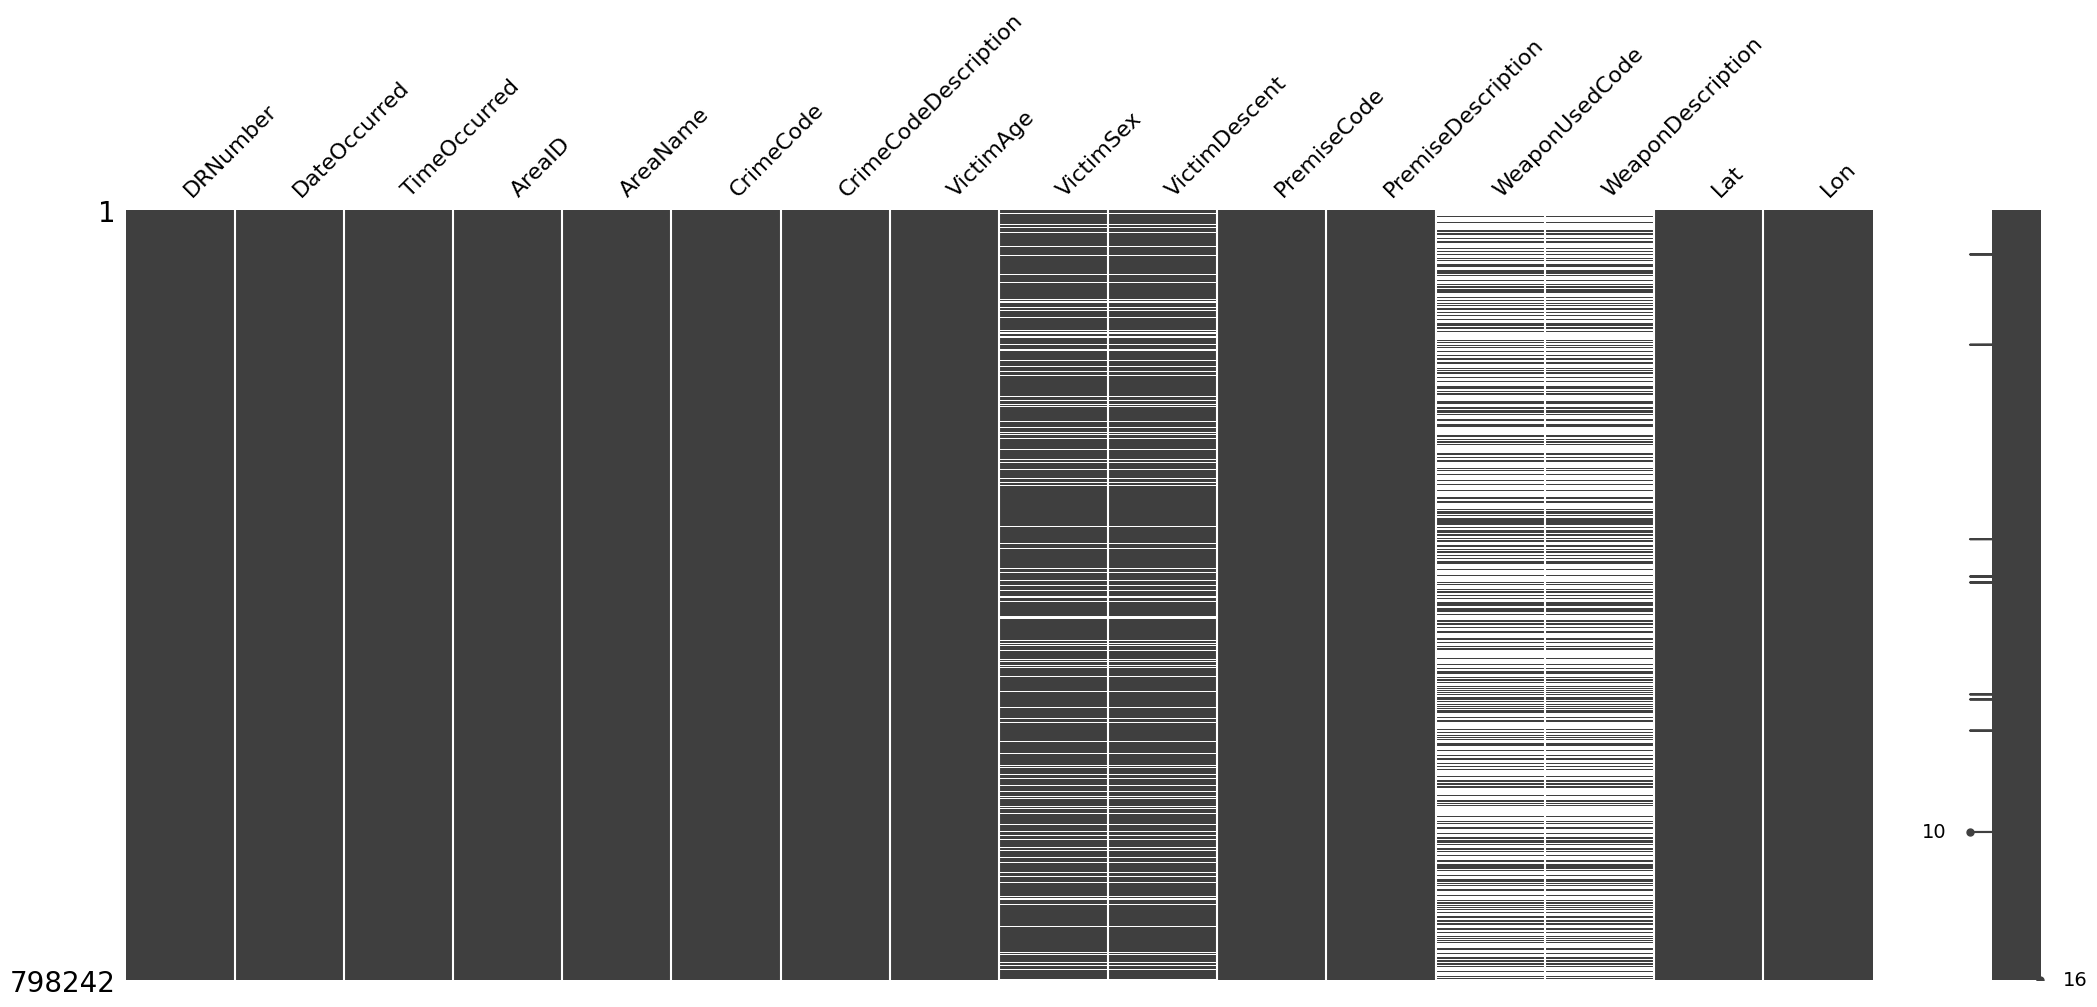

In [8]:
# using missingo library to check the missing and available data visually
# Dark squares: Data is present. 
# Light squares: Data is missing.
msno.matrix(df)
pyplot.show()

In [9]:
# checking for null values count for each column
df.isna().sum()

DRNumber                     0
DateOccurred                 0
TimeOccurred                 0
AreaID                       0
AreaName                     0
CrimeCode                    0
CrimeCodeDescription         0
VictimAge                    0
VictimSex               104653
VictimDescent           104661
PremiseCode                  9
PremiseDescription         472
WeaponUsedCode          520347
WeaponDescription       520347
Lat                          0
Lon                          0
dtype: int64

#### Converting the Reported and Occured date and time into time series index

In [10]:
# removing empty time stamp from Date Reported and Date Ocurred
df["DateOccurred"] = df["DateOccurred"].str.replace('T00:00:00', '')

In [11]:
# setting 'date occured' column as datetime object
df['DateOccurred'] = pd.to_datetime(df['DateOccurred'], format= '%m/%d/%Y %I:%M:%S %p')

In [12]:
# sorting according to Date Occurred
df = df.set_index('DateOccurred').sort_index()

In [13]:
# showing the first three row
df.tail(5)

,DRNumber,TimeOccurred,AreaID,AreaName,CrimeCode,CrimeCodeDescription,VictimAge,VictimSex,VictimDescent,PremiseCode,PremiseDescription,WeaponUsedCode,WeaponDescription,Lat,Lon
DateOccurred,,,,,,,,,,,,,,,
2023-09-11,232114033,1130,21,Topanga,330,BURGLARY FROM VEHICLE,0,NaN,NaN,108.0,PARKING LOT,NaN,NaN,34.1845,-118.5928
2023-09-11,231914018,630,19,Mission,510,VEHICLE - STOLEN,0,NaN,NaN,101.0,STREET,NaN,NaN,34.2355,-118.4553
2023-09-11,231417078,1120,14,Pacific,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),0,NaN,NaN,404.0,DEPARTMENT STORE,NaN,NaN,33.9978,-118.4605
2023-09-11,232114024,1130,21,Topanga,330,BURGLARY FROM VEHICLE,0,NaN,NaN,108.0,PARKING LOT,NaN,NaN,34.1845,-118.5928
2023-09-11,231317117,900,13,Newton,624,BATTERY - SIMPLE ASSAULT,58,F,H,935.0,MTA - BLUE LINE - WASHINGTON,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",34.0207,-118.2432


Now that we have the dataframe converted to a format for time series analysis, we can do basic data cleaning steps.  

#### Filling up the null values of Premise Code and Premise Description 

In [15]:
# replace the null values of Premise Code with 0
df['PremiseCode'].fillna(0, inplace = True)

# replace the null values of Premise Description with UNKNOWN
df['PremiseDescription'].fillna('UNKNOWN', inplace = True)

In [16]:
# checking if Premise Code have null values or not
df['PremiseCode'].isna().any()

False

In [17]:
# checking if Premise Description have null values or not
df['PremiseDescription'].isna().any()

False

9 null values from Premise Code and 472 values of Premise Description have been replaced with 0 and Unknown respectively

#### Checking for Outliers in Victim Age column and removing those

We can see that Victim Age has no null value. Checking for Outliers using boxplot visualization.

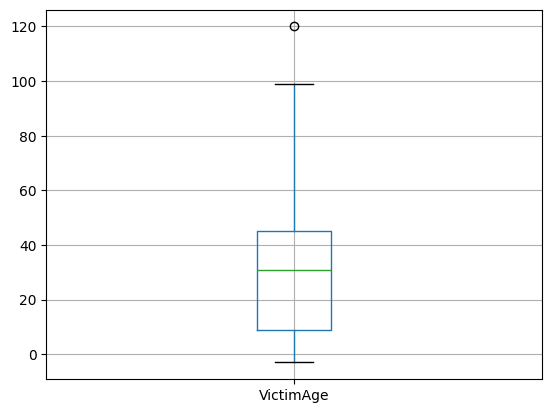

In [18]:
figure = df.boxplot(column='VictimAge')
pyplot.show()

Here we can see that there are few rows which have VictimAge below zero and 1 row has age 120.
Victim Age below zero is impossible. So, these are outliers. I will remove those rows.
Although, 120 is not impossible but I am considering this as outliers too. I will remove this too.

In [19]:
# total count
df['VictimAge'].count()

798242

In [20]:
# checking the count of rows which have values less than 0
below_0 = df[df['VictimAge'] < 0].count()
below_0['VictimAge']

68

In [21]:
# removing the rows which have Victim Age less than 0
df = df[df['VictimAge'] >= 0]

In [22]:
# total count
df['VictimAge'].count()

798174

In [23]:
# checking the count of rows which have values grater than 100
above_100 = df[df['VictimAge'] > 100].count()
above_100['VictimAge']

1

In [24]:
# removing the rows which have Victim Age grater than 100
df = df[df['VictimAge'] < 100]

In [25]:
# total count
df['VictimAge'].count()

798173

In [26]:
# re-checking if there is any null value
df['VictimAge'].isna().sum()

0

#### Checking the Count of Victim Sex, Types and replace those according to need

In [27]:
# type of Victim Sex and count
df['VictimSex'].value_counts()

VictimSex
M    330086
F    294367
X     68979
H        88
-         1
Name: count, dtype: int64

In [28]:
# Here, the data set has 104653 null values, replacing those with X
df['VictimSex'].fillna('X', inplace=True)

# Here, replacing 'H', '-' with X
df['VictimSex'].replace(to_replace=['H', '-'], value='X', inplace = True)

In [29]:
# type of Victim Sex and the count after replacing
df['VictimSex'].value_counts()

VictimSex
M    330086
F    294367
X    173720
Name: count, dtype: int64

In [30]:
# checking if there is any Sex out of expectations
df['VictimSex'].unique()

array(['F', 'M', 'X'], dtype=object)

#### Checking the Count of Victim Descent, Types and replace those according to need

In [31]:
# type of Victim Descent and count
df['VictimDescent'].value_counts()

VictimDescent
H    245080
W    163052
B    114044
X     76278
O     63324
A     17437
K      4258
F      3326
C      3040
J      1105
V       826
I       758
Z       402
P       214
U       165
D        57
G        52
L        49
S        44
-         2
Name: count, dtype: int64

In [32]:
# replacing the '-' into 'X'
df['VictimDescent'].replace(to_replace=['-'], value='X', inplace = True)

In [33]:
# Here, the data set has 104661 null values, replacing those with X`
df['VictimDescent'].fillna('X`', inplace= True)

In [34]:
# re-checking if there is any null value
df['VictimDescent'].isna().sum()

0

In [35]:
# type of Victim Descent and count after replacing the values
df['VictimDescent'].value_counts()

VictimDescent
H     245080
W     163052
B     114044
X`    104660
X      76280
O      63324
A      17437
K       4258
F       3326
C       3040
J       1105
V        826
I        758
Z        402
P        214
U        165
D         57
G         52
L         49
S         44
Name: count, dtype: int64

In [36]:
# Desecent Description 
descent_dict ={'A': 'Other Asian', 'B': 'Black', 'C': 'Chinese',
               'D': 'Cambodian', 'F': 'Filipino', 'G': 'Guamanian',
               'H': 'Latinx', 'I': 'Native', 'J': 'Japanese', 
               'K': 'Korean', 'L': 'Laotian', 'O': 'Other',
               'P': 'Pacific Islander', 'S': 'Samoan', 'U': 'Hawaiian',
               'V': 'Vietnamese', 'W': 'White',  'X': 'Unknown', 'X`':'Null Unknown', 'Z':'Asian Indian'}

#### Checking the Weapon Used Code and Weapon Description and replace those according to need

In [37]:
# the data set has 520347 null values for Weapon Used Code and Weapon Description
# replacing the null value fo Weapon Used Code with 0
df['WeaponUsedCode'].fillna(0, inplace = True)

# replacing the null value of Weapon Description with UNKNOWN
df['WeaponDescription'].fillna('UNKNOWN', inplace = True)

In [47]:
# re-checking if there is any null value
df['WeaponUsedCode'].isna().sum()

0

In [48]:
# re-checking if there is any null value
df['WeaponDescription'].isna().sum()

0

#### Checking the Crime Code and Crime Code Description

In [51]:
# Checking the unique count of Crime Code
df['CrimeCode'].value_counts().count()

138

In [52]:
# Checking the unique count of Crime Code Description
df['CrimeCodeDescription'].value_counts().count()

138

#### Checking the Area ID and Area Name

In [49]:
# Checking the unique count of Aread ID
df['AreaID'].value_counts().count()

21

In [50]:
# Checking the unique count of Aread Name
df['AreaName'].value_counts().count()

21

#### All the cleaned and checked features

In [53]:
cleaned_features = ['DRNumber', 'TimeOccurred', 'AreaID', 'AreaName'
                    , 'CrimeCode', 'CrimeCodeDescription', 'VictimAge',
                    'VictimSex', 'VictimDescent', 'PremiseCode', 'PremiseDescription',
                    'WeaponUsedCode', 'WeaponDescription', 'Lat', 'Lon']

In [54]:
# Saving cleaned data into cleaned_df
cleaned_df = df[cleaned_features]

In [55]:
# checking for null values count for each column
cleaned_df.isna().sum()

DRNumber                0
TimeOccurred            0
AreaID                  0
AreaName                0
CrimeCode               0
CrimeCodeDescription    0
VictimAge               0
VictimSex               0
VictimDescent           0
PremiseCode             0
PremiseDescription      0
WeaponUsedCode          0
WeaponDescription       0
Lat                     0
Lon                     0
dtype: int64